In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from uco.data_loader import RLEInput, RLEOutput, pivot_df

In [2]:
pseudo_csv = '../data/pseudo/submission.csv'
df = pd.read_csv(pseudo_csv)
print(df.shape)
df = pivot_df(df)
df.head()

(16844, 2)


,rle0,rle1,rle2,rle3,n_classes,c0,c1,c2,c3
Image,,,,,,,,,
2002-01-01-domain-a-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,214 22 537 85 881 95 1230 96 1580 97 1929 99 2...,61368 8 61698 33 62040 44 62381 55 62726 62 63...,NaN,NaN,2,True,True,False,False
2002-01-01-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,59659 6 59996 25 60336 37 60679 46 61025 51 61...,NaN,NaN,NaN,1,True,False,False,False
2002-01-01-domain-c-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,NaN,87296 45 87642 67 87988 80 88334 91 88677 105 ...,199 146 544 154 891 158 1240 159 1589 161 1937...,79 174 426 181 775 183 1123 185 1472 187 1820 ...,3,False,True,True,True
2002-01-02-domain-a-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,178 171 522 178 870 180 1220 181 1570 181 1920...,NaN,NaN,NaN,1,True,False,False,False
2002-01-02-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg,31299 11 31645 18 31993 23 32340 28 32688 32 3...,NaN,18 161 363 173 712 177 1062 177 1411 178 1761 ...,12669 23 13015 30 13362 35 13709 39 14058 41 1...,3,True,False,True,True


In [11]:
img = cv2.imread('../data/raw/joined_images/0a1b596.jpg')

TypeError: Image data of dtype object cannot be converted to float

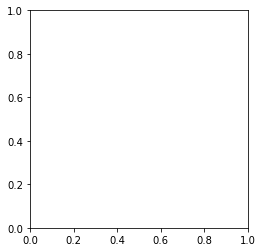

In [12]:
plt.imshow(img)

In [3]:
df.groupby('n_classes').count()

,rle0,rle1,rle2,rle3,c0,c1,c2,c3
n_classes,,,,,,,,
0,0,0,0,0,239,239,239,239
1,383,584,406,688,2061,2061,2061,2061
2,677,766,603,1334,1690,1690,1690,1690
3,175,132,140,210,219,219,219,219
4,2,2,2,2,2,2,2,2


In [ ]:
['Fish', 'Flower', 'Gravel', 'Sugar']

In [6]:
print(df.shape)
df.loc[df.n_classes == 0, :].index

(4211, 9)


Index(['2002-01-04-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-01-05-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-02-16-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-02-17-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-02-17-domain-c-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-02-26-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-02-26-domain-c-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-02-28-domain-b-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-03-05-domain-a-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       '2002-03-16-domain-a-MODIS-Terra-CorrectedReflectance-TrueColor.jpg',
       ...
       '2018-09-30-domain-c-MODIS-Aqua-CorrectedReflectance-TrueColor.jpg',
       '2018-11-07-domain-c-MODIS-Aqua-CorrectedReflectance-TrueColor.jpg',
       '2018-11-17-domain-c-MODIS-Aqua-CorrectedReflectance-TrueCol

In [8]:
df = df.loc[df.n_classes != 0, :]
df.shape

(3972, 9)

In [4]:
counts = {c: df[f'c{c}'].sum() for c in range(4)}
counts

# Test distribution:
# {0: 0.20988099531193652,
#  1: 0.23764875586007933,
#  2: 0.21168409664623153,
#  3: 0.36458708979444643}

{0: 1237, 1: 1484, 2: 1151, 3: 2234}

In [6]:
def pixel_count(s):
    if not isinstance(s, str):
        return 0
    mask = RLEInput.from_str(s).to_mask()
    return mask.sum()

def contains_defect(s):
    return isinstance(s, str)

In [7]:
df.iloc[:, 4]

Image
0011165.jpg    2
002be4f.jpg    3
0031ae9.jpg    3
0035239.jpg    2
003994e.jpg    3
              ..
ffcedf2.jpg    1
ffd11b6.jpg    2
ffd3dfb.jpg    1
ffd6680.jpg    2
ffea4f4.jpg    1
Name: n_classes, Length: 5546, dtype: int64

In [8]:
df['c0'] = df.iloc[:, 0].apply(contains_defect)
df['c1'] = df.iloc[:, 1].apply(contains_defect)
df['c2'] = df.iloc[:, 2].apply(contains_defect)
df['c3'] = df.iloc[:, 3].apply(contains_defect)

In [24]:
df['px0'] = df.iloc[:, 0].apply(pixel_count)
df['px1'] = df.iloc[:, 1].apply(pixel_count)
df['px2'] = df.iloc[:, 2].apply(pixel_count)
df['px3'] = df.iloc[:, 3].apply(pixel_count)
df.head(2)

,rle0,rle1,rle2,rle3,n_classes,c0,c1,c2,c3,px0,px1,px2,px3
Image,,,,,,,,,,,,,
0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,1355565 1002 1356965 1002 1358365 1002 1359765...,NaN,NaN,2,True,True,False,False,932312,1156107,0,0
002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,1339279 519 1340679 519 1342079 519 1343479 51...,NaN,67495 350 68895 350 70295 350 71695 350 73095 ...,3,True,True,False,True,1684325,592697,0,313950


In [10]:
H = RLEInput.MASK_H
W = RLEInput.MASK_W
N_Input = H * W
N_Input

2940000

In [11]:
H = RLEOutput.MASK_H
W = RLEOutput.MASK_W
N_Output = H * W
N_Output

183750

In [12]:
scale_output = N_Input / N_Output
scale_output

16.0

In [13]:
df.loc[df.px0 != 0, 'px0'].quantile(0.02) / scale_output

9573.1375

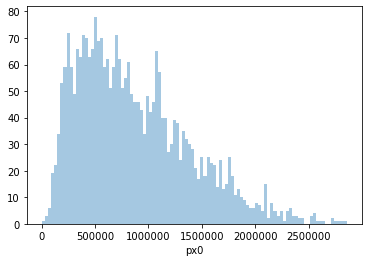

In [14]:
sns.distplot(df.loc[df.px0 != 0, 'px0'], bins=100, kde=False)

In [15]:
df.loc[df.px1 != 0, 'px1'].quantile(0.02) / scale_output

9670.0275

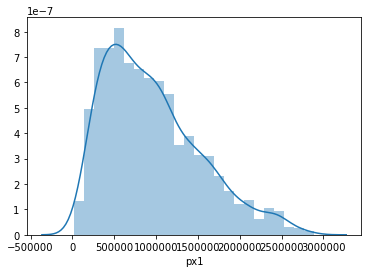

In [16]:
sns.distplot(df.loc[df.px1 != 0, 'px1'])

In [17]:
df.loc[df.px2 != 0, 'px2'].quantile(0.02) / scale_output

9019.9175

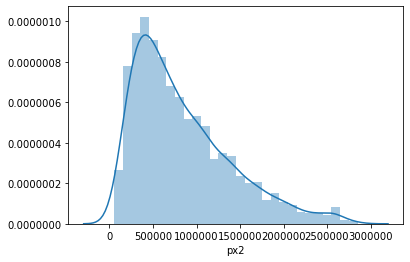

In [18]:
sns.distplot(df.loc[df.px2 != 0, 'px2'])

In [19]:
df.loc[df.px3 != 0, 'px3'].quantile(0.02) / scale_output

7885.75

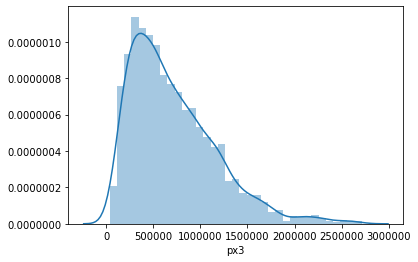

In [20]:
sns.distplot(df.loc[df.px3 != 0, 'px3'])

In [34]:
def analyse_component_sizes(rles):
    component_sizes = []
    for rle in tqdm(rles):
        mask = RLEInput.from_str(rle).to_mask()
        mask = cv2.resize(mask, (525, 350)).astype(np.uint8)
        max_label, labelled_components = cv2.connectedComponents(mask)
        for label in range(1, max_label+1):
            component_size = (labelled_components == label).sum()
            if component_size == 0:
                continue
            component_sizes.append(component_size)
    return component_sizes

In [35]:
c0_sizes = analyse_component_sizes(df.rle0.values)

100%|██████████| 5546/5546 [01:29<00:00, 62.25it/s]


In [36]:
sizes = np.array(c0_sizes)
len(sizes)

6414

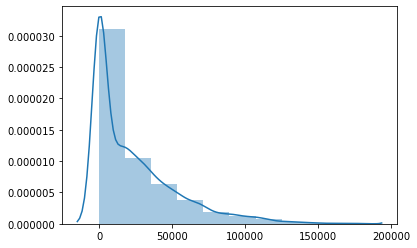

In [40]:
sns.distplot(sizes, bins=10)

In [ ]:
df.groupby(['c1', 'c2', 'c3', 'c4'])['defects'].count()

In [ ]:
df.c3.mean()

In [ ]:
df_empty.empty

In [ ]:
df_nodef = df.loc[df.defects > 0, :]
df_nodef.shape